In [1]:
%matplotlib inline

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.ticker import MaxNLocator
from scipy.stats.mstats import gmean

In [3]:
matplotlib.rcParams['text.usetex'] = True

In [4]:
def extract_metric_evolution(path, x_key, y_key):
    """Extract the series of values from file."""
    df = pd.read_csv(path)
    epochs = sorted(df['epoch'].unique())
    particles = sorted(df['particle'].unique())
    xs = [df[df['epoch']==epoch][x_key].values for epoch in epochs]
    ys = [df[df['epoch']==epoch][y_key].values for epoch in epochs]
    assert np.shape(xs) == (len(epochs), len(particles))
    assert np.shape(ys) == (len(epochs), len(particles))
    return np.asarray(xs), np.asarray(ys)

In [5]:
def rescale_linear(xs, yl, yh):
    """Rescale values linearly between [yl, yh]."""
    xl = min(xs)
    xh = max(xs)
    slope = float(yh - yl) / (xh - xl)
    intercept = yh - xh * slope
    return slope* xs + intercept

In [6]:
def unscale_linear(xs, yl, yh, xl, xh):
    """Rescale values linearly between [xl, xh]."""
    slope = float(yh - yl) / (xh - xl)
    intercept = yh - xh * slope
    return (xs - intercept) / slope

In [7]:
def plot_evolution_one(runtimes, metrics, label, color, ax):
    runtimes = runtimes[1:]
    metrics = metrics[1:]
    # Computing metrics to plot.
    x_runtime = np.cumsum(np.median(runtimes, axis=1))
    y_metric_median = np.median(metrics, axis=1)
    y_metric_high = np.percentile(metrics, 75, axis=1)
    y_metric_low = np.percentile(metrics, 25, axis=1)
    # Plot.
    step = 10
    ax.errorbar(x_runtime[::step], y_metric_median[::step],
        # yerr=[y_metric_median[::step]-y_metric_low[::step], y_metric_high[::step]-y_metric_median[::step]],
        linewidth=2, fmt='-.', markersize=5, label=label, color=color)
    # ax.plot(x_runtime[::10], y_metric_median[::10],
    # linewidth=1, label=label, color=color, marker=None)
    ax.set_ylim([0.10, 0.40])
    return ax

Plot runtime vs. accuracy

In [8]:
metric = 'rmse'
x_key = 'runtime'

In [9]:
paths_system = [
    ('Gen (Dynamic + Recurse)',
        '../resources/reports/stamp@2019327-134241_shortname@incremental-UB-mansour_ntest@20_iters@50_epochs@400_schedule@constant_seed@628723064.merged.report.csv'),
    ('Gen (Dynamic)',
        '../resources/reports/stamp@2019327-161013_shortname@lightweight-UB-mansour_ntest@20_iters@50_epochs@400_schedule@constant_seed@1305347891.merged.report.csv'),
    ('Julia (Handcoded)',
        '../resources/reports/stamp@2019326-173511_shortname@handcoded-rachelUB_ntest@20_iters@50_epochs@400_schedule@constant_seed@773783925.merged.report.csv'),
    ('Venture',
        '../resources/reports/stamp@20190328-124524_shortname@alec_ntest@20_iters@1000_epochs@20_schedule@constant_seed@1693420445.merged.report.csv')
]

/scratch/fsaad/pldi2019-gen-experiments/venv.2/local/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


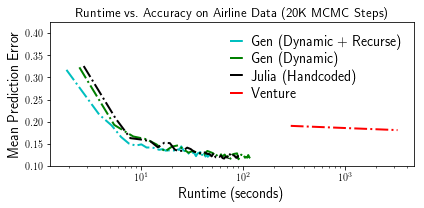

In [10]:
fig, ax = plt.subplots()
colors = ['c', 'g', 'k', 'r']
for i, (method, path) in enumerate(paths_system):
    runtimes, metrics = extract_metric_evolution(path, x_key, metric)
    ax = plot_evolution_one(runtimes, metrics, method, colors[i], ax)

ax.set_title('Runtime vs. Accuracy on Airline Data (20K MCMC Steps)', fontsize=13)
ax.set_ylabel('Mean Prediction Error', fontsize=14)
ax.set_xlabel('Runtime (seconds)', fontsize=14)
ax.legend(loc='upper right', framealpha=0, labelspacing=.2, handletextpad=.5, fontsize=14, handlelength=1)
# ax.grid(which='both', linewidth=1,  alpha=.2)
ax.set_xscale('log')
ax.set_ylim([0.10, 0.425])
fig.set_facecolor('white')
fig.set_tight_layout(True)
fig.set_size_inches(6, 3)

In [11]:
fig.savefig('airline-gen-handcoded-venturescript-runtime-rmse.pdf')

Plot different inference algorithms

In [12]:
metric = 'rmse'
x_key = 'runtime'

In [13]:
paths_inference = [
    ('Unbiased Schedule',
        '../resources/reports/stamp@2019327-134241_shortname@incremental-UB-mansour_ntest@20_iters@50_epochs@400_schedule@constant_seed@628723064.merged.report.csv'),
        # '../reports/lightweight-UB-mansour_ntest@20_iters@50_epochs@400_schedule@constant_seed@1305347891.merged.report.csv'),
    ('Biased Schedule',
         '../resources/reports/stamp@2019329-151910_shortname@incremental-BI-mansour_ntest@20_iters@50_epochs@400_schedule@constant_seed@375436494.merged.report.csv'),
        # '../resources/reports/stamp@2019327-131032_shortname@lightweight-BI-mansour_ntest@20_iters@50_epochs@400_schedule@constant_seed@1712523333.merged.report.csv'),
    ('Full Schedule',
          '../resources/reports/stamp@2019329-153516_shortname@incremental-RT-mansour_ntest@20_iters@50_epochs@400_schedule@constant_seed@3012477778.merged.report.csv'),
        # '../resources/reports/stamp@2019327-13026_shortname@lightweight-RT-mansour_ntest@20_iters@50_epochs@400_schedule@constant_seed@2424813171.merged.report.csv'),
]

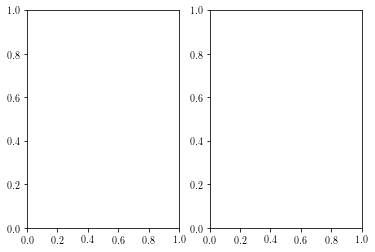

In [14]:
fig, axes = plt.subplots(ncols=2);

In [15]:
ax = axes[1]
colors = ['c', 'r', 'k']
for i, (method, path) in enumerate(paths_inference):
    runtimes, metrics = extract_metric_evolution(path, x_key, metric)
    ax = plot_evolution_one(runtimes, metrics, method, colors[i], ax)

ax.set_title('Runtime vs. Error', fontsize=16)
ax.set_ylabel('Error', fontsize=14)
ax.set_xlabel('Runtime (seconds)', fontsize=16)
ax.legend(loc='upper right', framealpha=0, labelspacing=.2, handletextpad=.15, fontsize=16, handlelength=1)
ax.set_ylim([0.10, 0.425])
fig.set_facecolor('white')
ax.xaxis.set_tick_params(labelsize=13)
ax.yaxis.set_tick_params(labelsize=13)
ax.set_xticks([0, 10, 20, 30, 40, 50]);

Plot observed and forecasted data

In [16]:
import json

In [17]:
fname = '../resources/results/stamp@20181102-155414_shortname@vs-euHdMzVkOW_ntest@20_iters@5_epochs@200_schedule@constant_seed@725158738.json'
with open(fname, 'r') as f:
    results = json.load(f)

In [18]:
predictions = results['statistics'][-1]['predictions_held_out']

In [19]:
(x_min, y_min) = (1.949041666666666742e+03, 1.12e+02)
(x_max, y_max) = (1.960958333333333258e+03, 4.32e+02)

In [20]:
xs_train = unscale_linear(np.array(results['xs_train']), 0, 1, x_min, x_max)
ys_train = unscale_linear(np.array(results['ys_train']), -1, 1, y_min, y_max)
xs_test = unscale_linear(np.array(results['xs_test']), 0, 1, x_min, x_max)
ys_test = unscale_linear(np.array(results['ys_test']), -1, 1, y_min, y_max)
predictions = unscale_linear(np.array(predictions), -1, 1, y_min, y_max)

In [21]:
ax = axes[0]
ax.plot(xs_train, ys_train, marker='.', linestyle='--', color='k', label='Observed Data')
for p in predictions:
    ax.plot(xs_test, p, linestyle='-', color='g', alpha=.025)
ax.plot([], [], color='g', label='Predictions')
ax.scatter(xs_test, ys_test, marker='+', color='r', s=30, label='Held-out Data')
ax.legend(framealpha=0, loc='upper left', fontsize=16, handletextpad=.2, handlelength=1.5, labelspacing=0)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Passenger Volume', fontsize=16)
# ax.set_title('Airline Dataset', fontsize=13)
ax.set_ylim([100, 500])
ax.set_xlim([1947.5, None])
ax.set_title('Airline Passenger Data', fontsize=16)
ax.xaxis.set_major_locator(MaxNLocator(steps=[2], integer=True))
ax.xaxis.set_tick_params(labelsize=13)
ax.yaxis.set_tick_params(labelsize=13)

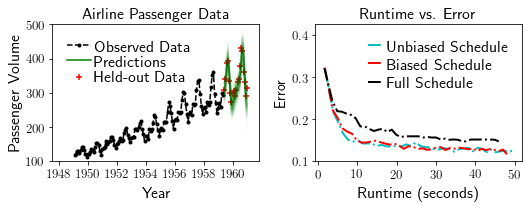

In [22]:
fig.set_tight_layout(True)
fig.set_size_inches(7.5, 3);
fig

In [23]:
fig.savefig('airline-data-runtime.pdf')

Report runtime statistics

In [24]:
def report_runtime(runtimes, method):
    runtimes = runtimes[1:]
    runtimes_total = np.cumsum(runtimes, axis=0)
    median = np.median(runtimes_total, axis=1)[-1]
    upper = np.percentile(runtimes_total, 75, axis=1)[-1]
    lower = np.percentile(runtimes_total, 25, axis=1)[-1]
    IQR = (upper-lower)
    ms_per_step = lambda x: x/20000 * 1000
    with open('gp-runtime', 'a') as f:
        print('%s: %1.2f (+- %1.2f)' % (method, ms_per_step(median), ms_per_step(IQR)), file=f)

In [25]:
!rm -f gp-runtime && touch gp-runtime
for method, path in paths_system:
    runtimes, metrics = extract_metric_evolution(path, 'runtime', metric)
    report_runtime(runtimes, method)

In [26]:
!rm -f gp-loc && touch gp-loc
!wc -l ../resources/gp_model_0.vnts >> gp-loc
!wc -l ../lightweight.jl >> gp-loc
!wc -l ../incremental.jl >> gp-loc
!wc -l ../handcoded.jl >> gp-loc

In [27]:
!cat gp-loc

59 ../resources/gp_model_0.vnts
133 ../lightweight.jl
258 ../incremental.jl
260 ../handcoded.jl


In [28]:
!cat gp-runtime

Gen (Dynamic + Recurse): 2.57 (+- 0.09)
Gen (Dynamic): 6.21 (+- 0.94)
Julia (Handcoded): 4.73 (+- 0.45)
Venture: 279.73 (+- 30.78)
